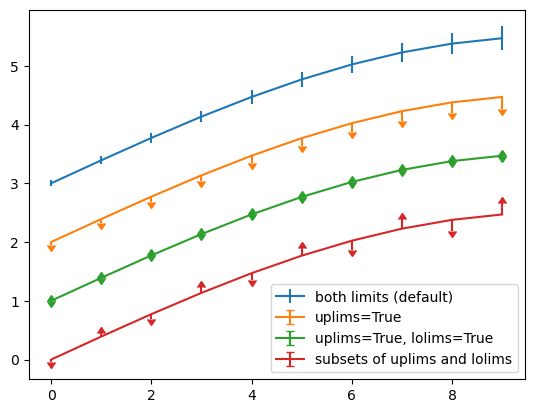

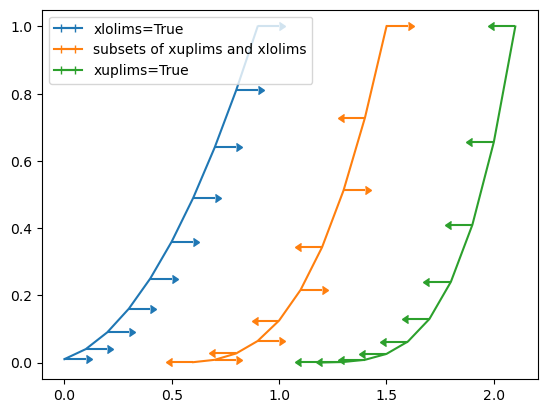

In [1]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
x = np.arange(10)
y = 2.5 * np.sin(x / 20 * np.pi)
yerr = np.linspace(0.05, 0.2, 10)

plt.errorbar(x, y + 3, yerr=yerr, label='both limits (default)')

plt.errorbar(x, y + 2, yerr=yerr, uplims=True, label='uplims=True')

plt.errorbar(x, y + 1, yerr=yerr, uplims=True, lolims=True,
             label='uplims=True, lolims=True')

upperlimits = [True, False] * 5
lowerlimits = [False, True] * 5
plt.errorbar(x, y, yerr=yerr, uplims=upperlimits, lolims=lowerlimits,
             label='subsets of uplims and lolims')

plt.legend(loc='lower right')


# %%
# Similarly ``xuplims`` and ``xlolims`` can be used on the horizontal ``xerr``
# errorbars.

fig = plt.figure()
x = np.arange(10) / 10
y = (x + 0.1)**2

plt.errorbar(x, y, xerr=0.1, xlolims=True, label='xlolims=True')
y = (x + 0.1)**3

plt.errorbar(x + 0.6, y, xerr=0.1, xuplims=upperlimits, xlolims=lowerlimits,
             label='subsets of xuplims and xlolims')

y = (x + 0.1)**4
plt.errorbar(x + 1.2, y, xerr=0.1, xuplims=True, label='xuplims=True')

plt.legend()

plt.show()

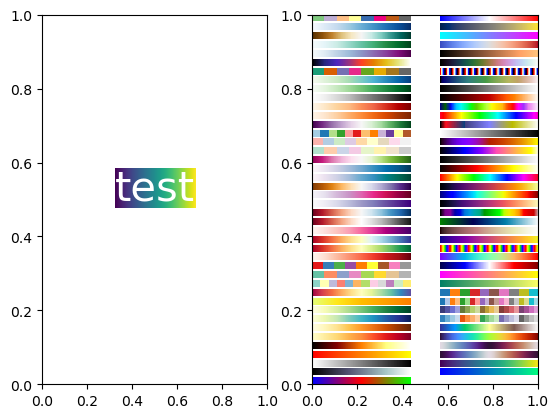

In [2]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.image import BboxImage
from matplotlib.transforms import Bbox, TransformedBbox

fig, (ax1, ax2) = plt.subplots(ncols=2)

# ----------------------------
# Create a BboxImage with Text
# ----------------------------
txt = ax1.text(0.5, 0.5, "test", size=30, ha="center", color="w")
ax1.add_artist(
    BboxImage(txt.get_window_extent, data=np.arange(256).reshape((1, -1))))

# ------------------------------------
# Create a BboxImage for each colormap
# ------------------------------------
# List of all colormaps; skip reversed colormaps.
cmap_names = sorted(m for m in plt.colormaps if not m.endswith("_r"))

ncol = 2
nrow = len(cmap_names) // ncol + 1

xpad_fraction = 0.3
dx = 1 / (ncol + xpad_fraction * (ncol - 1))

ypad_fraction = 0.3
dy = 1 / (nrow + ypad_fraction * (nrow - 1))

for i, cmap_name in enumerate(cmap_names):
    ix, iy = divmod(i, nrow)
    bbox0 = Bbox.from_bounds(ix*dx*(1+xpad_fraction),
                             1 - iy*dy*(1+ypad_fraction) - dy,
                             dx, dy)
    bbox = TransformedBbox(bbox0, ax2.transAxes)
    ax2.add_artist(
        BboxImage(bbox, cmap=cmap_name, data=np.arange(256).reshape((1, -1))))

plt.show()

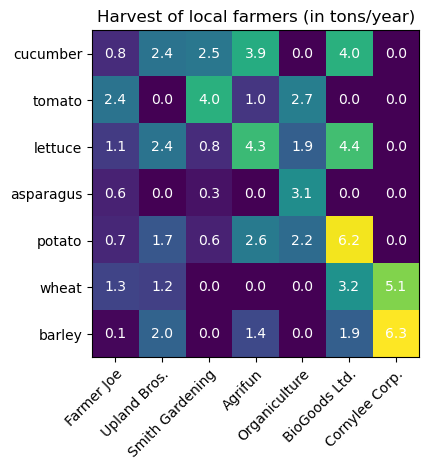

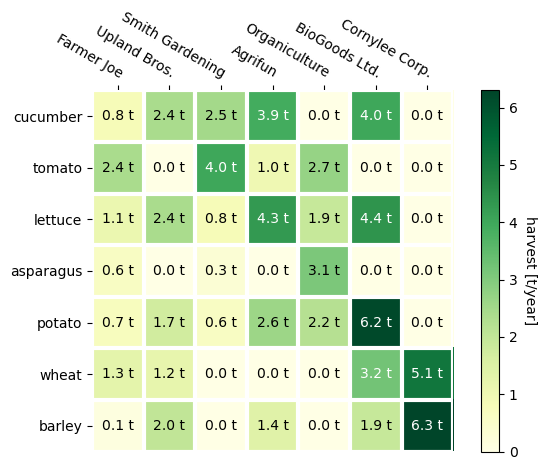

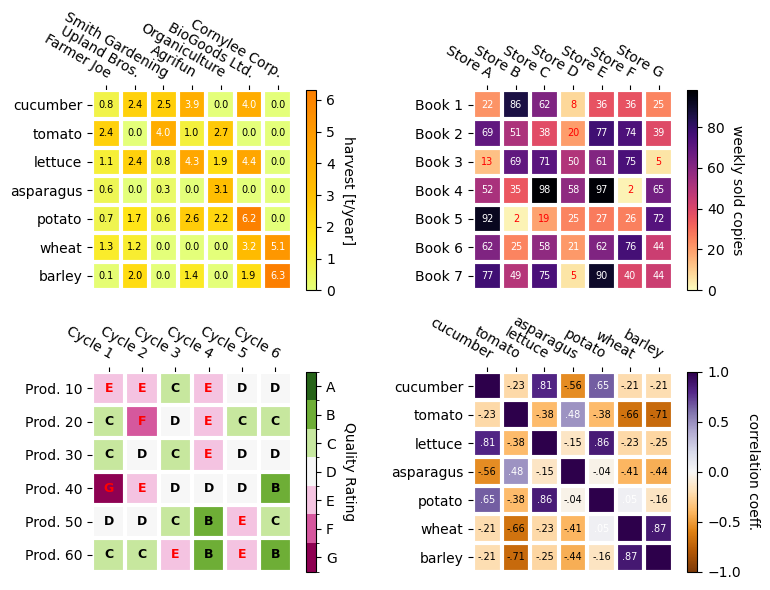

In [4]:
import matplotlib.pyplot as plt
import numpy as np

import matplotlib
import matplotlib as mpl

# sphinx_gallery_thumbnail_number = 2

vegetables = ["cucumber", "tomato", "lettuce", "asparagus",
              "potato", "wheat", "barley"]
farmers = ["Farmer Joe", "Upland Bros.", "Smith Gardening",
           "Agrifun", "Organiculture", "BioGoods Ltd.", "Cornylee Corp."]

harvest = np.array([[0.8, 2.4, 2.5, 3.9, 0.0, 4.0, 0.0],
                    [2.4, 0.0, 4.0, 1.0, 2.7, 0.0, 0.0],
                    [1.1, 2.4, 0.8, 4.3, 1.9, 4.4, 0.0],
                    [0.6, 0.0, 0.3, 0.0, 3.1, 0.0, 0.0],
                    [0.7, 1.7, 0.6, 2.6, 2.2, 6.2, 0.0],
                    [1.3, 1.2, 0.0, 0.0, 0.0, 3.2, 5.1],
                    [0.1, 2.0, 0.0, 1.4, 0.0, 1.9, 6.3]])


fig, ax = plt.subplots()
im = ax.imshow(harvest)

# Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(len(farmers)), labels=farmers)
ax.set_yticks(np.arange(len(vegetables)), labels=vegetables)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(vegetables)):
    for j in range(len(farmers)):
        text = ax.text(j, i, harvest[i, j],
                       ha="center", va="center", color="w")

ax.set_title("Harvest of local farmers (in tons/year)")
fig.tight_layout()
plt.show()


# %%
# Using the helper function code style
# ------------------------------------
#
# As discussed in the :ref:`Coding styles <coding_styles>`
# one might want to reuse such code to create some kind of heatmap
# for different input data and/or on different axes.
# We create a function that takes the data and the row and column labels as
# input, and allows arguments that are used to customize the plot
#
# Here, in addition to the above we also want to create a colorbar and
# position the labels above of the heatmap instead of below it.
# The annotations shall get different colors depending on a threshold
# for better contrast against the pixel color.
# Finally, we turn the surrounding axes spines off and create
# a grid of white lines to separate the cells.


def heatmap(data, row_labels, col_labels, ax=None,
            cbar_kw=None, cbarlabel="", **kwargs):
    """
    Create a heatmap from a numpy array and two lists of labels.

    Parameters
    ----------
    data
        A 2D numpy array of shape (M, N).
    row_labels
        A list or array of length M with the labels for the rows.
    col_labels
        A list or array of length N with the labels for the columns.
    ax
        A `matplotlib.axes.Axes` instance to which the heatmap is plotted.  If
        not provided, use current axes or create a new one.  Optional.
    cbar_kw
        A dictionary with arguments to `matplotlib.Figure.colorbar`.  Optional.
    cbarlabel
        The label for the colorbar.  Optional.
    **kwargs
        All other arguments are forwarded to `imshow`.
    """

    if ax is None:
        ax = plt.gca()

    if cbar_kw is None:
        cbar_kw = {}

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    # Show all ticks and label them with the respective list entries.
    ax.set_xticks(np.arange(data.shape[1]), labels=col_labels)
    ax.set_yticks(np.arange(data.shape[0]), labels=row_labels)

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=-30, ha="right",
             rotation_mode="anchor")

    # Turn spines off and create white grid.
    ax.spines[:].set_visible(False)

    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)

    return im, cbar


def annotate_heatmap(im, data=None, valfmt="{x:.2f}",
                     textcolors=("black", "white"),
                     threshold=None, **textkw):
    """
    A function to annotate a heatmap.

    Parameters
    ----------
    im
        The AxesImage to be labeled.
    data
        Data used to annotate.  If None, the image's data is used.  Optional.
    valfmt
        The format of the annotations inside the heatmap.  This should either
        use the string format method, e.g. "$ {x:.2f}", or be a
        `matplotlib.ticker.Formatter`.  Optional.
    textcolors
        A pair of colors.  The first is used for values below a threshold,
        the second for those above.  Optional.
    threshold
        Value in data units according to which the colors from textcolors are
        applied.  If None (the default) uses the middle of the colormap as
        separation.  Optional.
    **kwargs
        All other arguments are forwarded to each call to `text` used to create
        the text labels.
    """

    if not isinstance(data, (list, np.ndarray)):
        data = im.get_array()

    # Normalize the threshold to the images color range.
    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(data.max())/2.

    # Set default alignment to center, but allow it to be
    # overwritten by textkw.
    kw = dict(horizontalalignment="center",
              verticalalignment="center")
    kw.update(textkw)

    # Get the formatter in case a string is supplied
    if isinstance(valfmt, str):
        valfmt = matplotlib.ticker.StrMethodFormatter(valfmt)

    # Loop over the data and create a `Text` for each "pixel".
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            kw.update(color=textcolors[int(im.norm(data[i, j]) > threshold)])
            text = im.axes.text(j, i, valfmt(data[i, j], None), **kw)
            texts.append(text)

    return texts


# %%
# The above now allows us to keep the actual plot creation pretty compact.
#

fig, ax = plt.subplots()

im, cbar = heatmap(harvest, vegetables, farmers, ax=ax,
                   cmap="YlGn", cbarlabel="harvest [t/year]")
texts = annotate_heatmap(im, valfmt="{x:.1f} t")

fig.tight_layout()
plt.show()


# %%
# Some more complex heatmap examples
# ----------------------------------
#
# In the following we show the versatility of the previously created
# functions by applying it in different cases and using different arguments.
#

np.random.seed(19680801)

fig, ((ax, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(8, 6))

# Replicate the above example with a different font size and colormap.

im, _ = heatmap(harvest, vegetables, farmers, ax=ax,
                cmap="Wistia", cbarlabel="harvest [t/year]")
annotate_heatmap(im, valfmt="{x:.1f}", size=7)

# Create some new data, give further arguments to imshow (vmin),
# use an integer format on the annotations and provide some colors.

data = np.random.randint(2, 100, size=(7, 7))
y = [f"Book {i}" for i in range(1, 8)]
x = [f"Store {i}" for i in list("ABCDEFG")]
im, _ = heatmap(data, y, x, ax=ax2, vmin=0,
                cmap="magma_r", cbarlabel="weekly sold copies")
annotate_heatmap(im, valfmt="{x:d}", size=7, threshold=20,
                 textcolors=("red", "white"))

# Sometimes even the data itself is categorical. Here we use a
# `matplotlib.colors.BoundaryNorm` to get the data into classes
# and use this to colorize the plot, but also to obtain the class
# labels from an array of classes.

data = np.random.randn(6, 6)
y = [f"Prod. {i}" for i in range(10, 70, 10)]
x = [f"Cycle {i}" for i in range(1, 7)]

qrates = list("ABCDEFG")
norm = matplotlib.colors.BoundaryNorm(np.linspace(-3.5, 3.5, 8), 7)
fmt = matplotlib.ticker.FuncFormatter(lambda x, pos: qrates[::-1][norm(x)])

im, _ = heatmap(data, y, x, ax=ax3,
                cmap=mpl.colormaps["PiYG"].resampled(7), norm=norm,
                cbar_kw=dict(ticks=np.arange(-3, 4), format=fmt),
                cbarlabel="Quality Rating")

annotate_heatmap(im, valfmt=fmt, size=9, fontweight="bold", threshold=-1,
                 textcolors=("red", "black"))

# We can nicely plot a correlation matrix. Since this is bound by -1 and 1,
# we use those as vmin and vmax. We may also remove leading zeros and hide
# the diagonal elements (which are all 1) by using a
# `matplotlib.ticker.FuncFormatter`.

corr_matrix = np.corrcoef(harvest)
im, _ = heatmap(corr_matrix, vegetables, vegetables, ax=ax4,
                cmap="PuOr", vmin=-1, vmax=1,
                cbarlabel="correlation coeff.")


def func(x, pos):
    return f"{x:.2f}".replace("0.", ".").replace("1.00", "")

annotate_heatmap(im, valfmt=matplotlib.ticker.FuncFormatter(func), size=7)


plt.tight_layout()
plt.show()


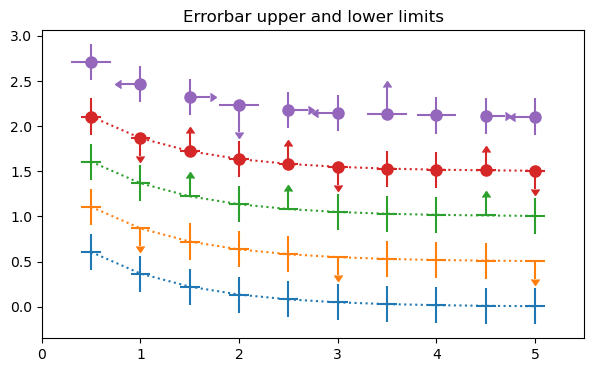

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# example data
x = np.array([0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0])
y = np.exp(-x)
xerr = 0.1
yerr = 0.2

# lower & upper limits of the error
lolims = np.array([0, 0, 1, 0, 1, 0, 0, 0, 1, 0], dtype=bool)
uplims = np.array([0, 1, 0, 0, 0, 1, 0, 0, 0, 1], dtype=bool)
ls = 'dotted'

fig, ax = plt.subplots(figsize=(7, 4))

# standard error bars
ax.errorbar(x, y, xerr=xerr, yerr=yerr, linestyle=ls)

# including upper limits
ax.errorbar(x, y + 0.5, xerr=xerr, yerr=yerr, uplims=uplims,
            linestyle=ls)

# including lower limits
ax.errorbar(x, y + 1.0, xerr=xerr, yerr=yerr, lolims=lolims,
            linestyle=ls)

# including upper and lower limits
ax.errorbar(x, y + 1.5, xerr=xerr, yerr=yerr,
            lolims=lolims, uplims=uplims,
            marker='o', markersize=8,
            linestyle=ls)

# Plot a series with lower and upper limits in both x & y
# constant x-error with varying y-error
xerr = 0.2
yerr = np.full_like(x, 0.2)
yerr[[3, 6]] = 0.3

# mock up some limits by modifying previous data
xlolims = lolims
xuplims = uplims
lolims = np.zeros_like(x)
uplims = np.zeros_like(x)
lolims[[6]] = True  # only limited at this index
uplims[[3]] = True  # only limited at this index

# do the plotting
ax.errorbar(x, y + 2.1, xerr=xerr, yerr=yerr,
            xlolims=xlolims, xuplims=xuplims,
            uplims=uplims, lolims=lolims,
            marker='o', markersize=8,
            linestyle='none')

# tidy up the figure
ax.set_xlim((0, 5.5))
ax.set_title('Errorbar upper and lower limits')
plt.show()

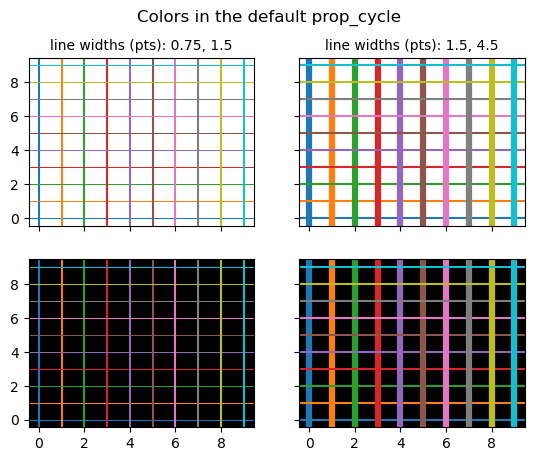

In [6]:
import matplotlib.pyplot as plt
import numpy as np

prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

lwbase = plt.rcParams['lines.linewidth']
thin = lwbase / 2
thick = lwbase * 3

fig, axs = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True)
for icol in range(2):
    if icol == 0:
        lwx, lwy = thin, lwbase
    else:
        lwx, lwy = lwbase, thick
    for irow in range(2):
        for i, color in enumerate(colors):
            axs[irow, icol].axhline(i, color=color, lw=lwx)
            axs[irow, icol].axvline(i, color=color, lw=lwy)

    axs[1, icol].set_facecolor('k')
    axs[1, icol].xaxis.set_ticks(np.arange(0, 10, 2))
    axs[0, icol].set_title(f'line widths (pts): {lwx:g}, {lwy:g}',
                           fontsize='medium')

for irow in range(2):
    axs[irow, 0].yaxis.set_ticks(np.arange(0, 10, 2))

fig.suptitle('Colors in the default prop_cycle', fontsize='large')

plt.show()

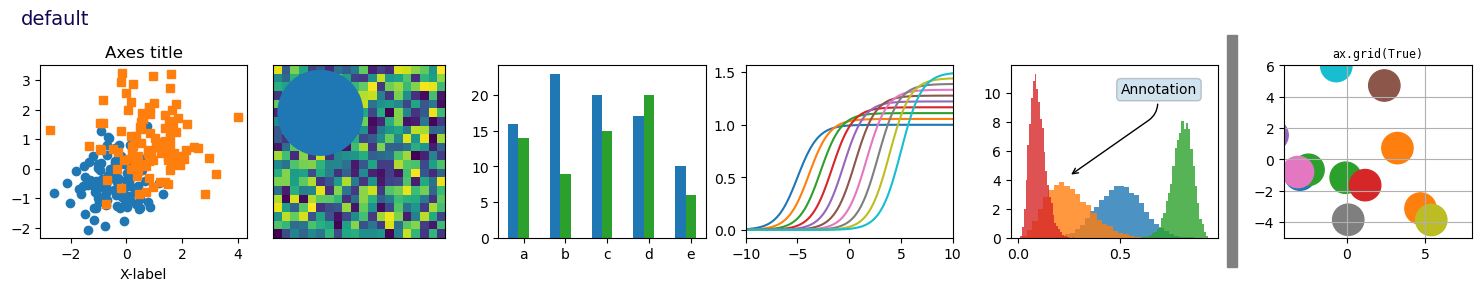

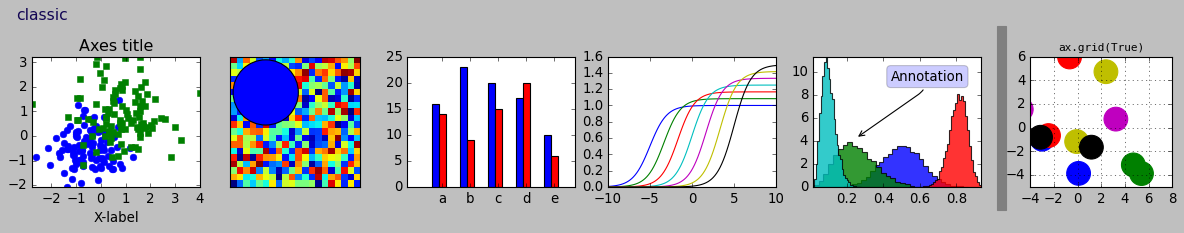

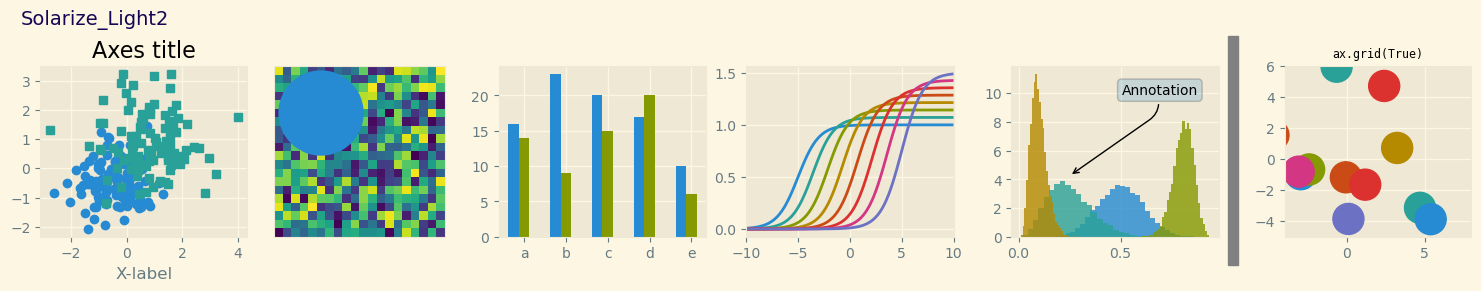

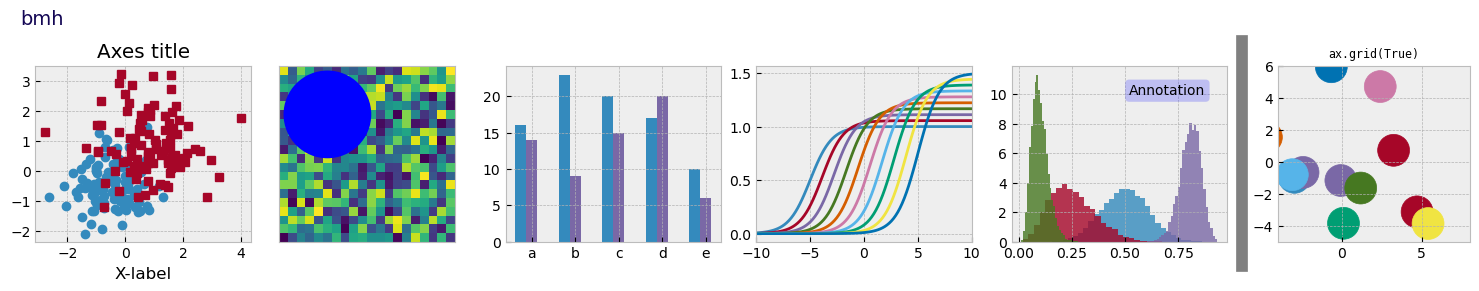

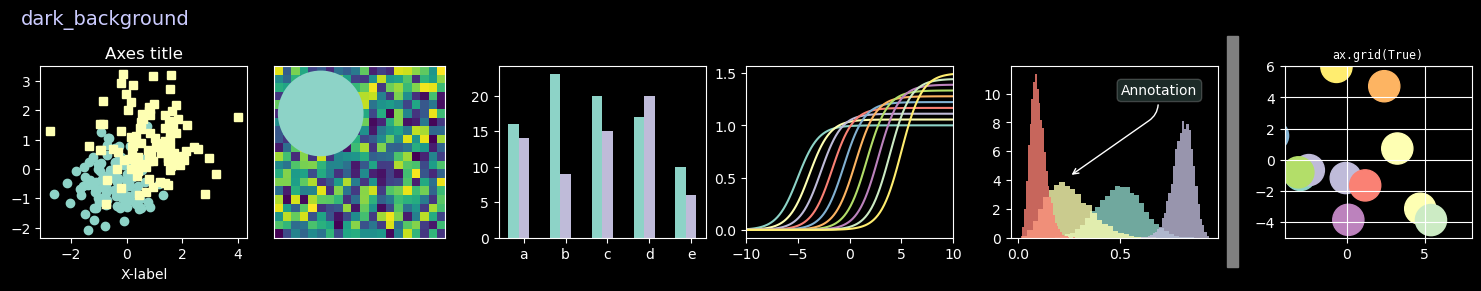

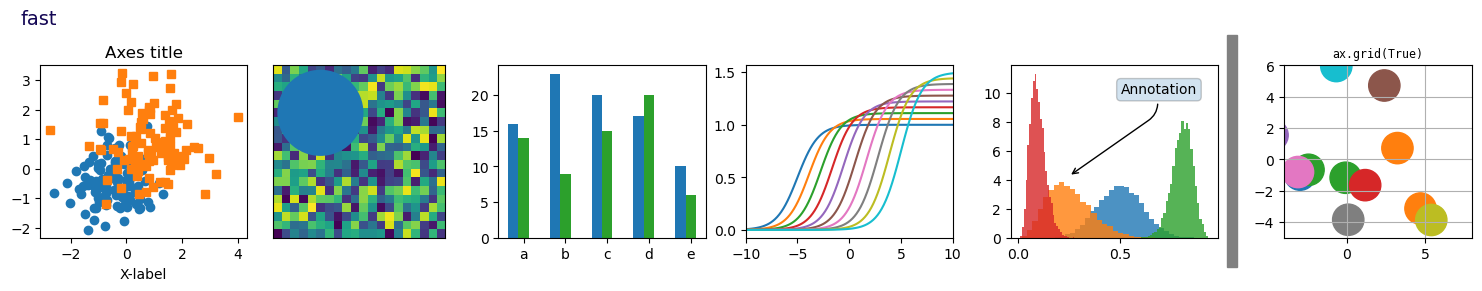

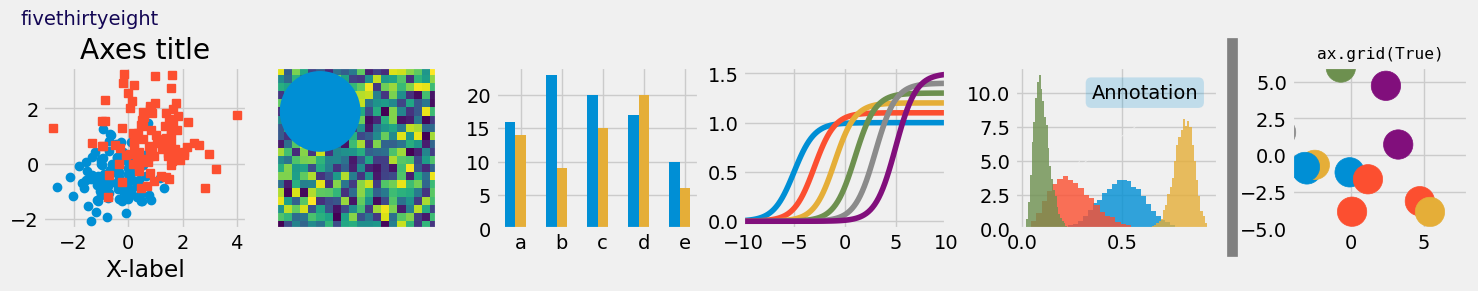

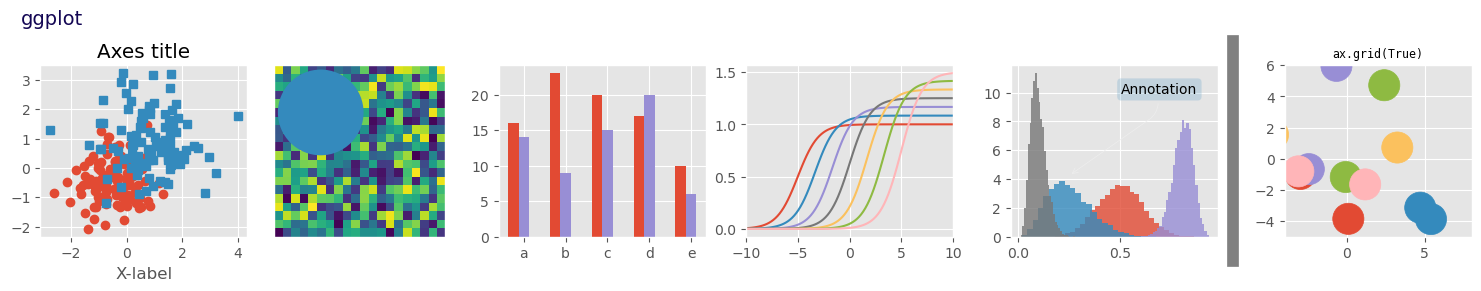

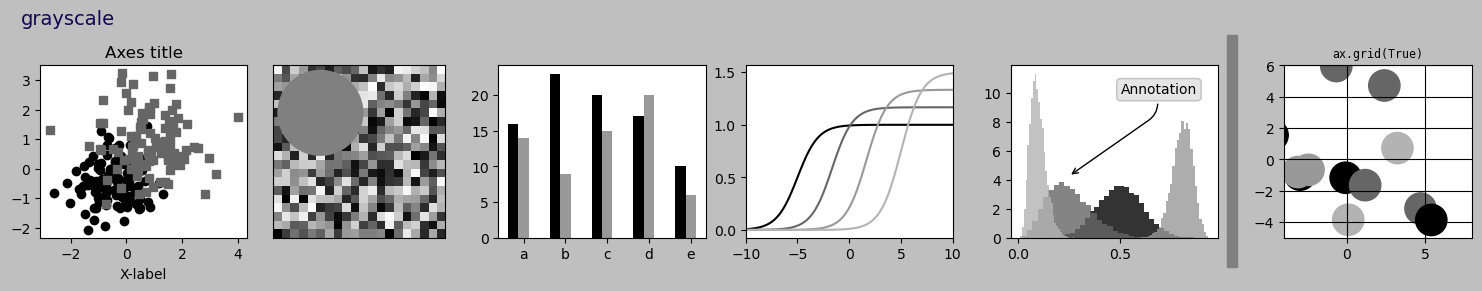

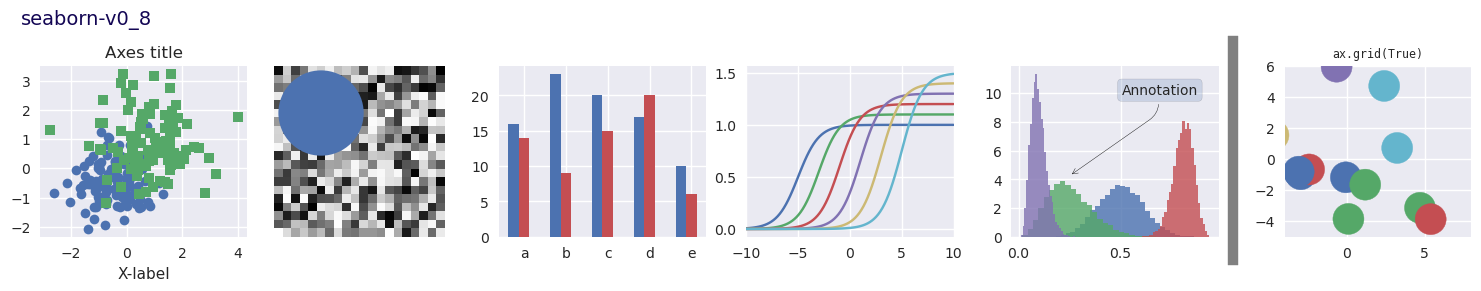

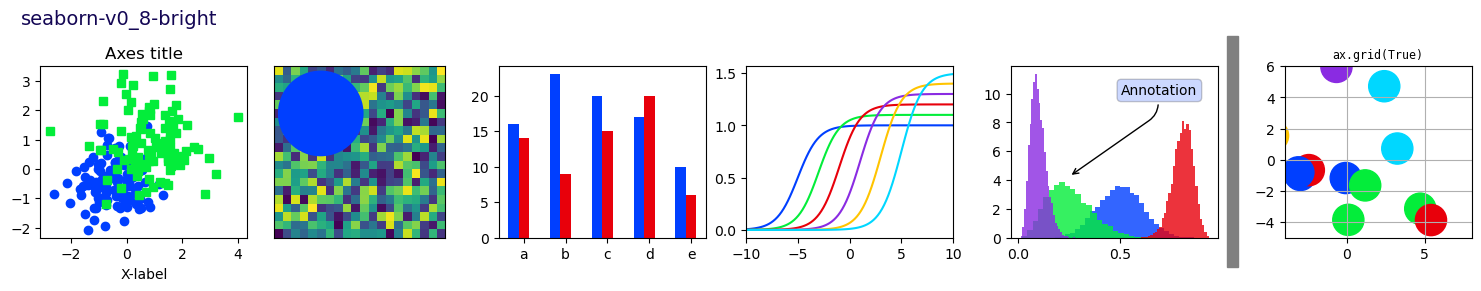

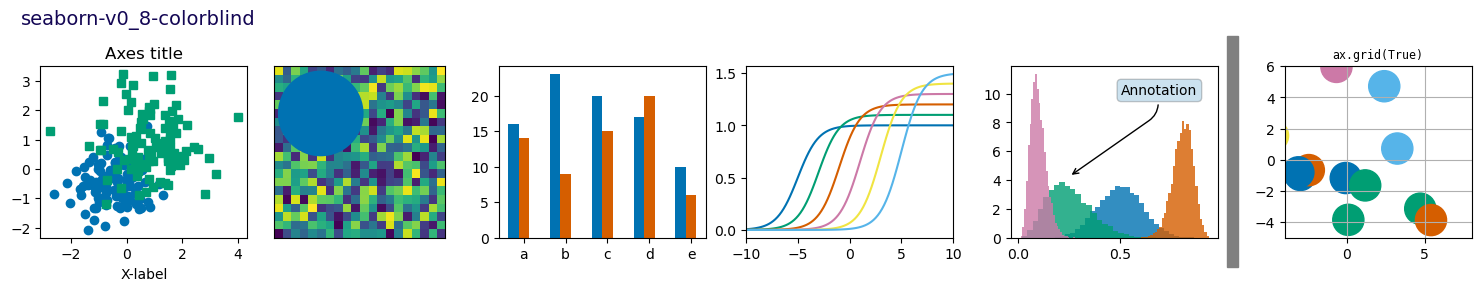

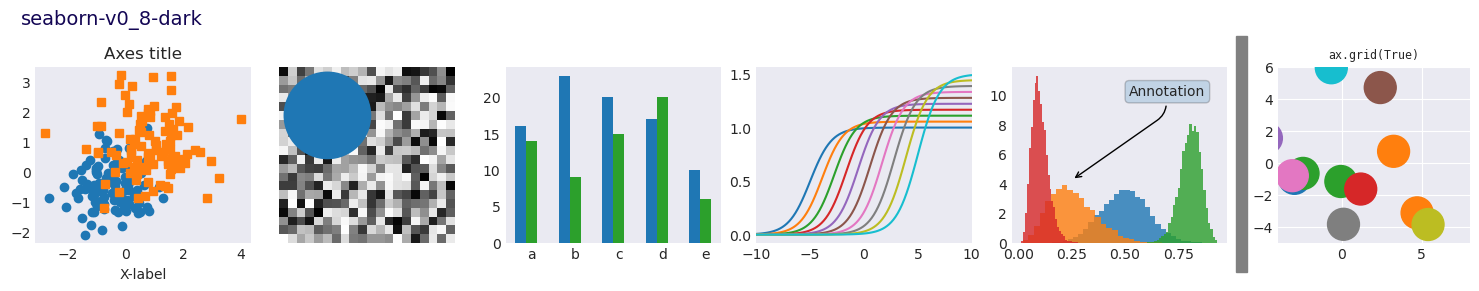

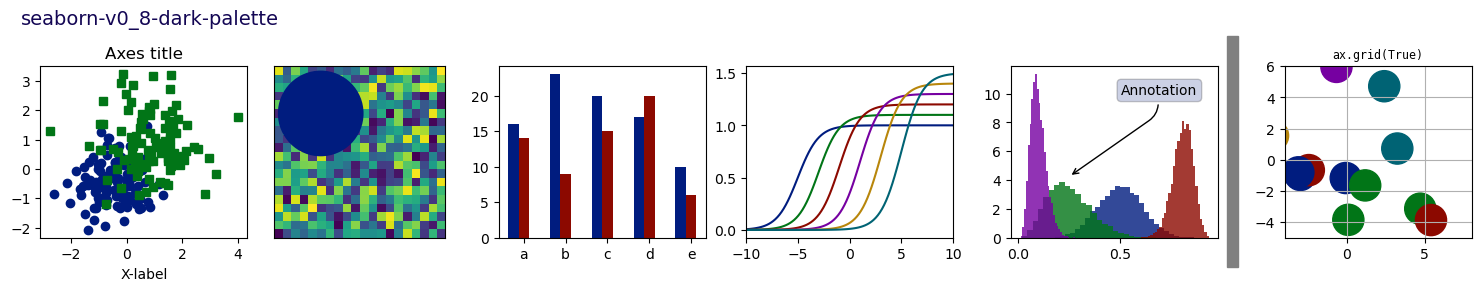

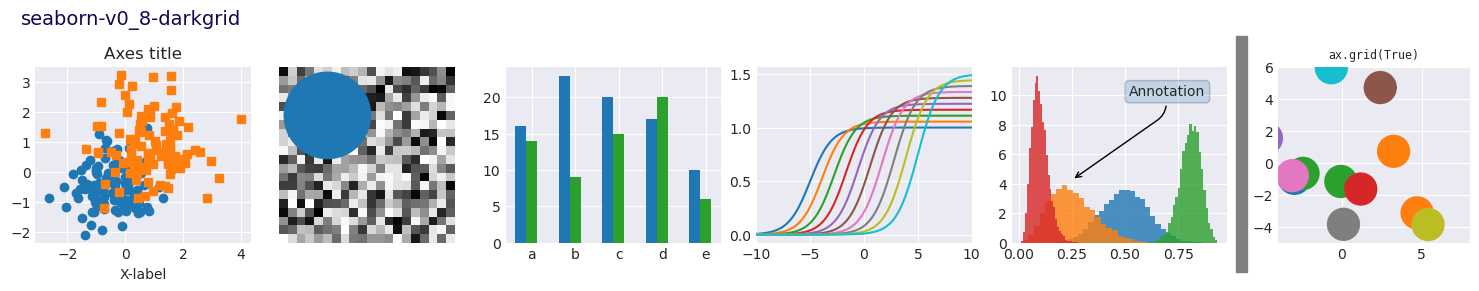

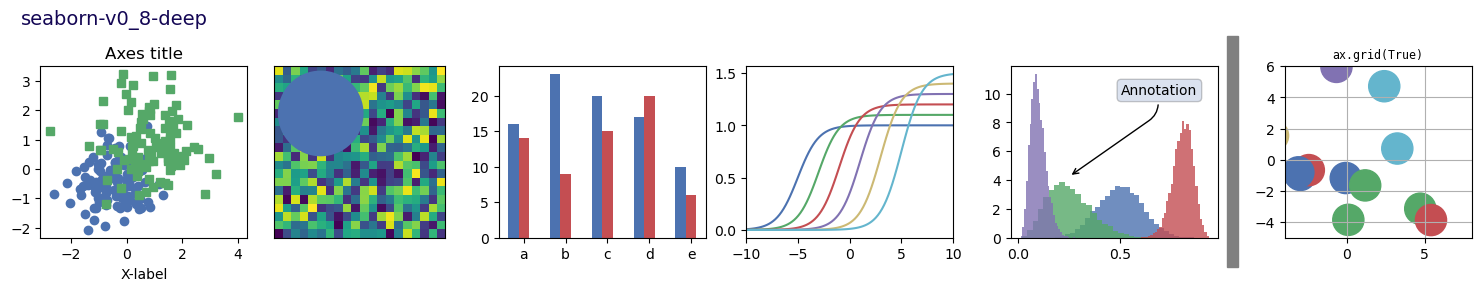

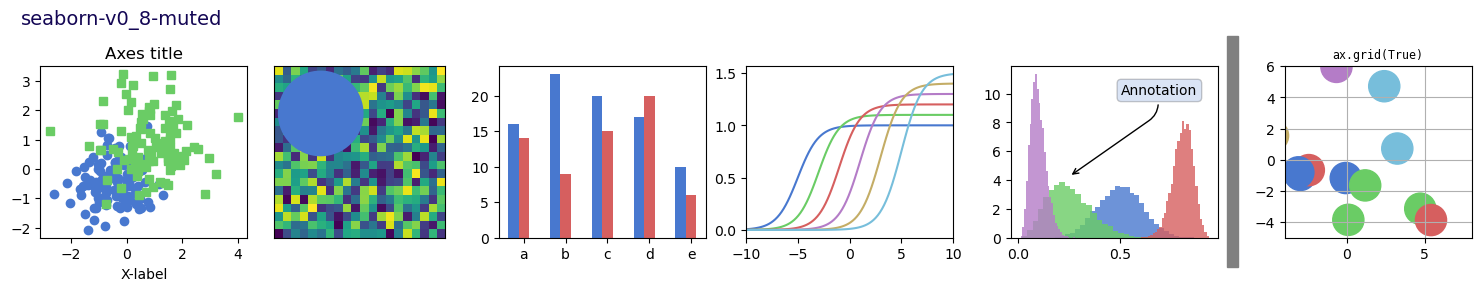

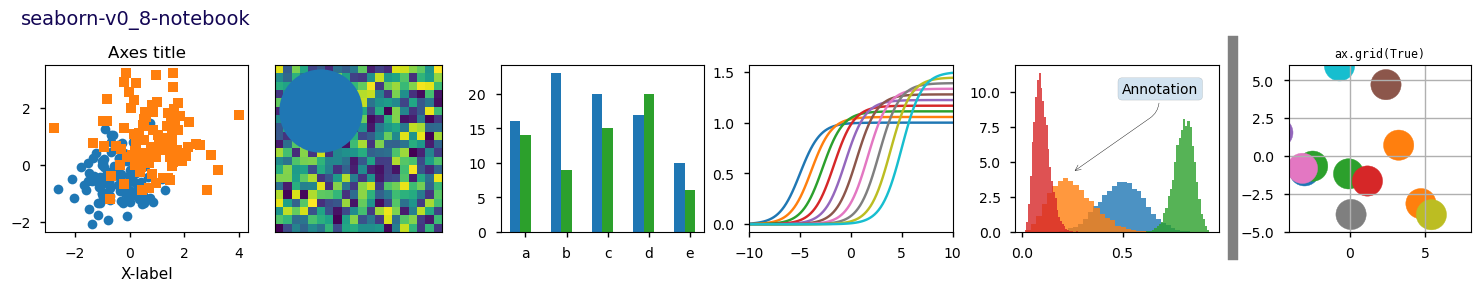

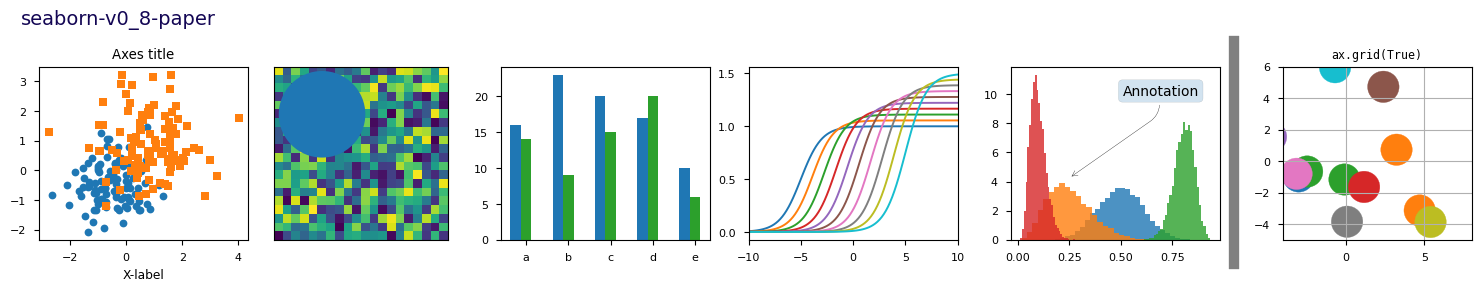

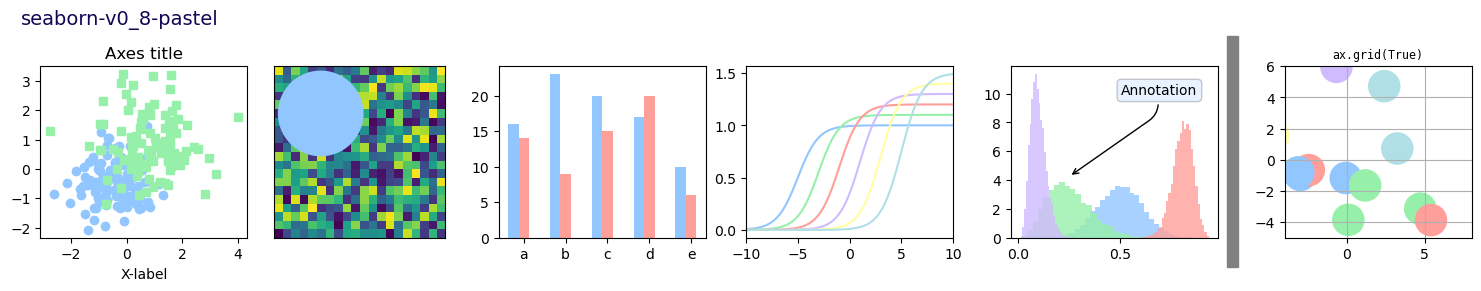

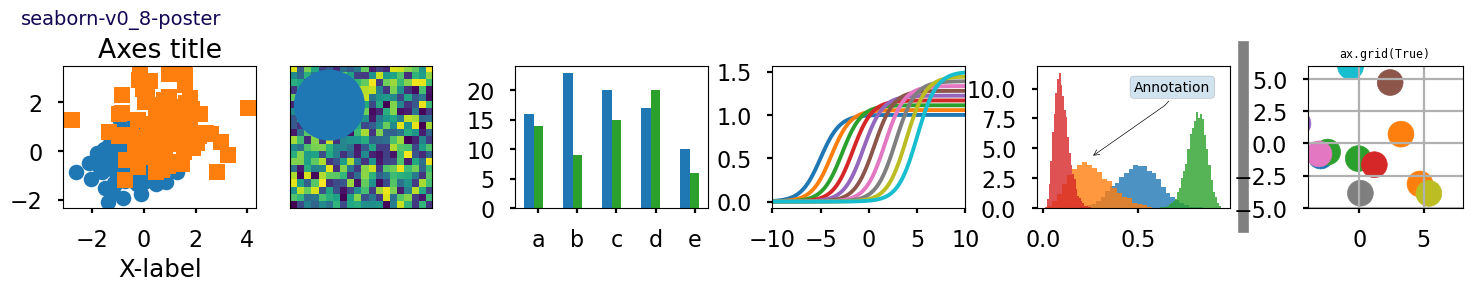

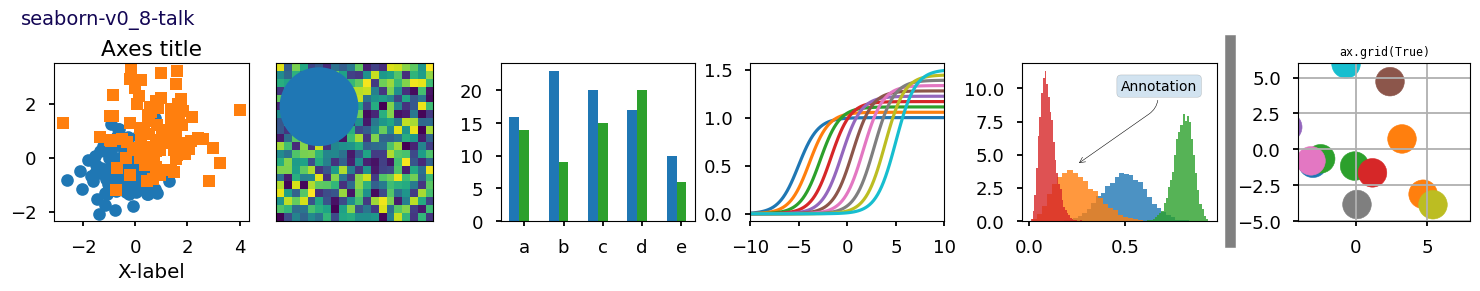

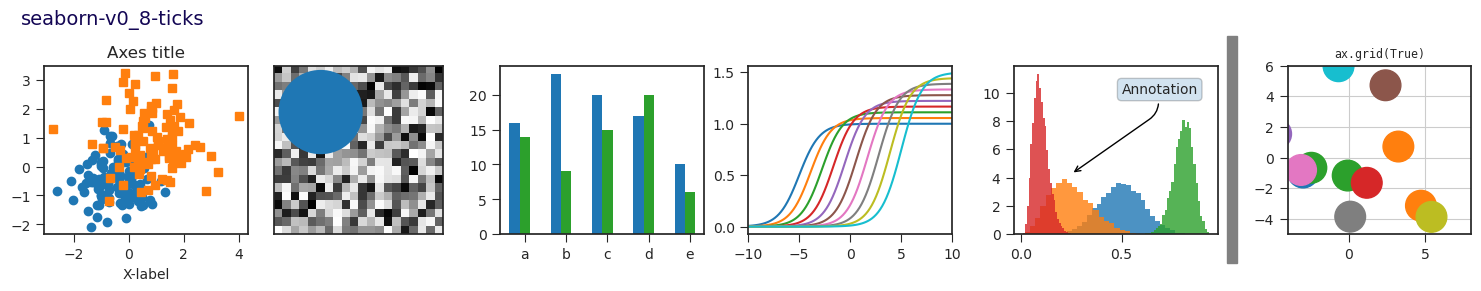

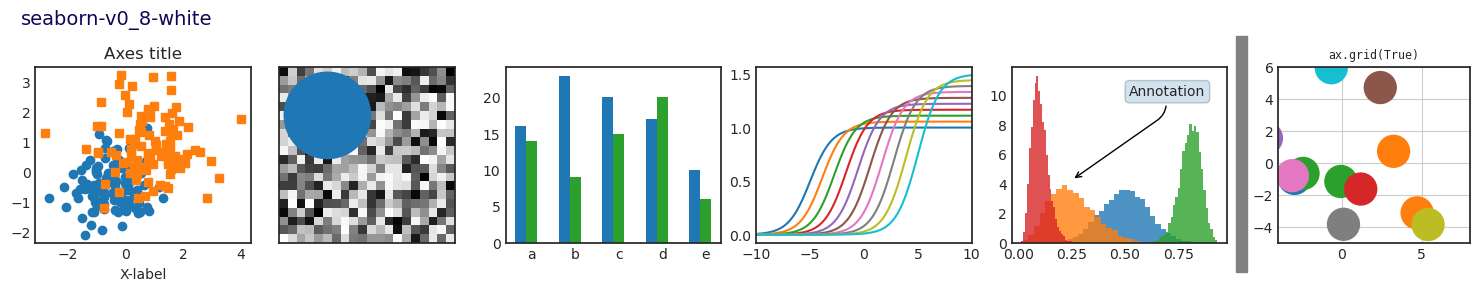

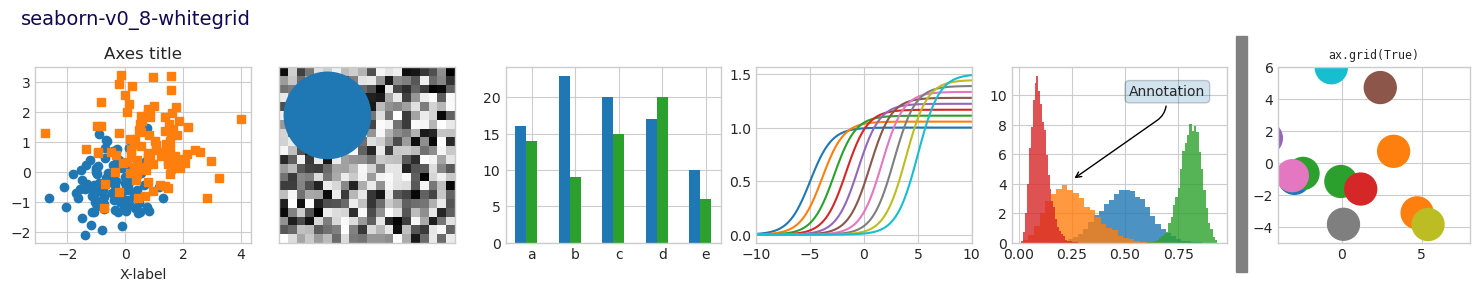

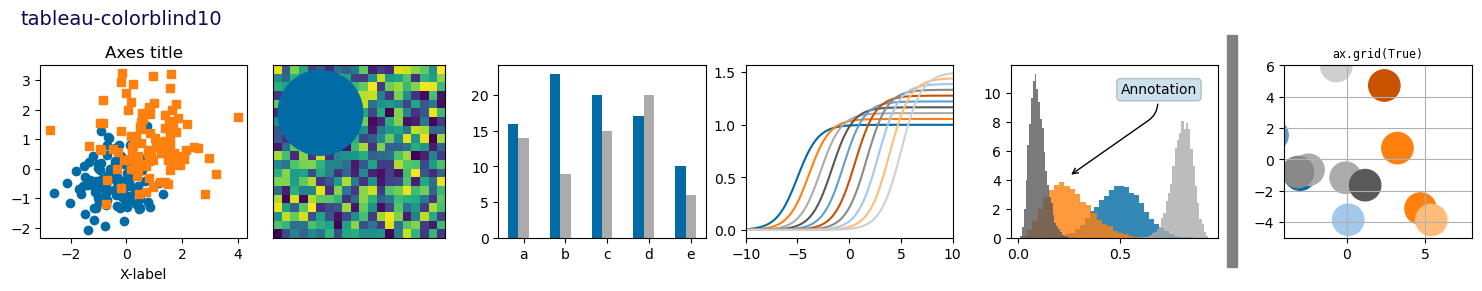

In [7]:
import matplotlib.pyplot as plt
import numpy as np

import matplotlib.colors as mcolors
from matplotlib.patches import Rectangle

# Fixing random state for reproducibility
np.random.seed(19680801)


def plot_scatter(ax, prng, nb_samples=100):
    """Scatter plot."""
    for mu, sigma, marker in [(-.5, 0.75, 'o'), (0.75, 1., 's')]:
        x, y = prng.normal(loc=mu, scale=sigma, size=(2, nb_samples))
        ax.plot(x, y, ls='none', marker=marker)
    ax.set_xlabel('X-label')
    ax.set_title('Axes title')
    return ax


def plot_colored_lines(ax):
    """Plot lines with colors following the style color cycle."""
    t = np.linspace(-10, 10, 100)

    def sigmoid(t, t0):
        return 1 / (1 + np.exp(-(t - t0)))

    nb_colors = len(plt.rcParams['axes.prop_cycle'])
    shifts = np.linspace(-5, 5, nb_colors)
    amplitudes = np.linspace(1, 1.5, nb_colors)
    for t0, a in zip(shifts, amplitudes):
        ax.plot(t, a * sigmoid(t, t0), '-')
    ax.set_xlim(-10, 10)
    return ax


def plot_bar_graphs(ax, prng, min_value=5, max_value=25, nb_samples=5):
    """Plot two bar graphs side by side, with letters as x-tick labels."""
    x = np.arange(nb_samples)
    ya, yb = prng.randint(min_value, max_value, size=(2, nb_samples))
    width = 0.25
    ax.bar(x, ya, width)
    ax.bar(x + width, yb, width, color='C2')
    ax.set_xticks(x + width, labels=['a', 'b', 'c', 'd', 'e'])
    return ax


def plot_colored_circles(ax, prng, nb_samples=15):
    """
    Plot circle patches.

    NB: draws a fixed amount of samples, rather than using the length of
    the color cycle, because different styles may have different numbers
    of colors.
    """
    for sty_dict, j in zip(plt.rcParams['axes.prop_cycle'](),
                           range(nb_samples)):
        ax.add_patch(plt.Circle(prng.normal(scale=3, size=2),
                                radius=1.0, color=sty_dict['color']))
    ax.grid(visible=True)

    # Add title for enabling grid
    plt.title('ax.grid(True)', family='monospace', fontsize='small')

    ax.set_xlim([-4, 8])
    ax.set_ylim([-5, 6])
    ax.set_aspect('equal', adjustable='box')  # to plot circles as circles
    return ax


def plot_image_and_patch(ax, prng, size=(20, 20)):
    """Plot an image with random values and superimpose a circular patch."""
    values = prng.random_sample(size=size)
    ax.imshow(values, interpolation='none')
    c = plt.Circle((5, 5), radius=5, label='patch')
    ax.add_patch(c)
    # Remove ticks
    ax.set_xticks([])
    ax.set_yticks([])


def plot_histograms(ax, prng, nb_samples=10000):
    """Plot 4 histograms and a text annotation."""
    params = ((10, 10), (4, 12), (50, 12), (6, 55))
    for a, b in params:
        values = prng.beta(a, b, size=nb_samples)
        ax.hist(values, histtype="stepfilled", bins=30,
                alpha=0.8, density=True)

    # Add a small annotation.
    ax.annotate('Annotation', xy=(0.25, 4.25),
                xytext=(0.9, 0.9), textcoords=ax.transAxes,
                va="top", ha="right",
                bbox=dict(boxstyle="round", alpha=0.2),
                arrowprops=dict(
                          arrowstyle="->",
                          connectionstyle="angle,angleA=-95,angleB=35,rad=10"),
                )
    return ax


def plot_figure(style_label=""):
    """Setup and plot the demonstration figure with a given style."""
    # Use a dedicated RandomState instance to draw the same "random" values
    # across the different figures.
    prng = np.random.RandomState(96917002)

    fig, axs = plt.subplots(ncols=6, nrows=1, num=style_label,
                            figsize=(14.8, 2.8), layout='constrained')

    # make a suptitle, in the same style for all subfigures,
    # except those with dark backgrounds, which get a lighter color:
    background_color = mcolors.rgb_to_hsv(
        mcolors.to_rgb(plt.rcParams['figure.facecolor']))[2]
    if background_color < 0.5:
        title_color = [0.8, 0.8, 1]
    else:
        title_color = np.array([19, 6, 84]) / 256
    fig.suptitle(style_label, x=0.01, ha='left', color=title_color,
                 fontsize=14, fontfamily='DejaVu Sans', fontweight='normal')

    plot_scatter(axs[0], prng)
    plot_image_and_patch(axs[1], prng)
    plot_bar_graphs(axs[2], prng)
    plot_colored_lines(axs[3])
    plot_histograms(axs[4], prng)
    plot_colored_circles(axs[5], prng)

    # add divider
    rec = Rectangle((1 + 0.025, -2), 0.05, 16,
                    clip_on=False, color='gray')

    axs[4].add_artist(rec)

if __name__ == "__main__":

    # Set up a list of all available styles, in alphabetical order but
    # the `default` and `classic` ones, which will be forced resp. in
    # first and second position.
    # styles with leading underscores are for internal use such as testing
    # and plot types gallery. These are excluded here.
    style_list = ['default', 'classic'] + sorted(
        style for style in plt.style.available
        if style != 'classic' and not style.startswith('_'))

    # Plot a demonstration figure for every available style sheet.
    for style_label in style_list:
        with plt.rc_context({"figure.max_open_warning": len(style_list)}):
            with plt.style.context(style_label):
                plot_figure(style_label=style_label)

    plt.show()

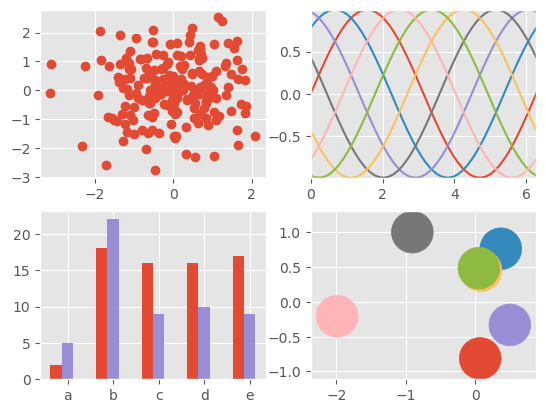

In [8]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('ggplot')

# Fixing random state for reproducibility
np.random.seed(19680801)

fig, axs = plt.subplots(ncols=2, nrows=2)
ax1, ax2, ax3, ax4 = axs.flat

# scatter plot (Note: `plt.scatter` doesn't use default colors)
x, y = np.random.normal(size=(2, 200))
ax1.plot(x, y, 'o')

# sinusoidal lines with colors from default color cycle
L = 2*np.pi
x = np.linspace(0, L)
ncolors = len(plt.rcParams['axes.prop_cycle'])
shift = np.linspace(0, L, ncolors, endpoint=False)
for s in shift:
    ax2.plot(x, np.sin(x + s), '-')
ax2.margins(0)

# bar graphs
x = np.arange(5)
y1, y2 = np.random.randint(1, 25, size=(2, 5))
width = 0.25
ax3.bar(x, y1, width)
ax3.bar(x + width, y2, width,
        color=list(plt.rcParams['axes.prop_cycle'])[2]['color'])
ax3.set_xticks(x + width, labels=['a', 'b', 'c', 'd', 'e'])

# circles with colors from default color cycle
for i, color in enumerate(plt.rcParams['axes.prop_cycle']):
    xy = np.random.normal(size=2)
    ax4.add_patch(plt.Circle(xy, radius=0.3, color=color['color']))
ax4.axis('equal')
ax4.margins(0)

plt.show()

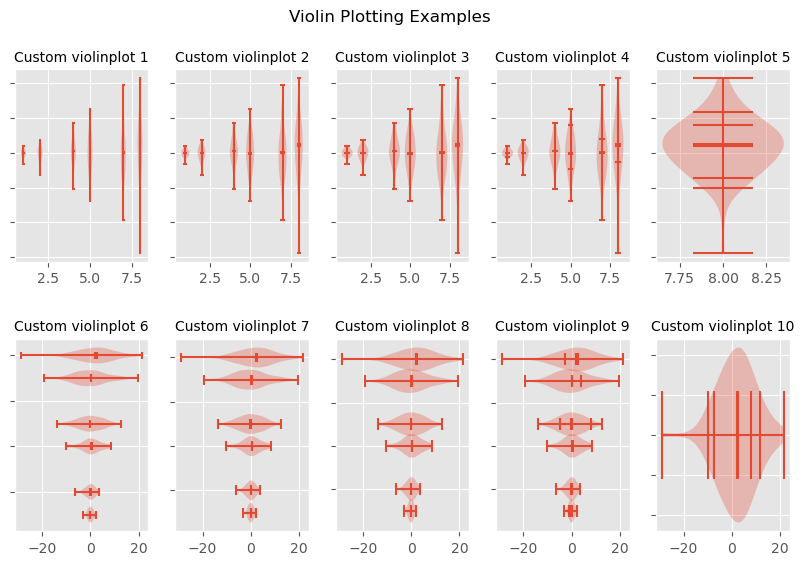

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)


# fake data
fs = 10  # fontsize
pos = [1, 2, 4, 5, 7, 8]
data = [np.random.normal(0, std, size=100) for std in pos]

fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(10, 6))

axs[0, 0].violinplot(data, pos, points=20, widths=0.3,
                     showmeans=True, showextrema=True, showmedians=True)
axs[0, 0].set_title('Custom violinplot 1', fontsize=fs)

axs[0, 1].violinplot(data, pos, points=40, widths=0.5,
                     showmeans=True, showextrema=True, showmedians=True,
                     bw_method='silverman')
axs[0, 1].set_title('Custom violinplot 2', fontsize=fs)

axs[0, 2].violinplot(data, pos, points=60, widths=0.7, showmeans=True,
                     showextrema=True, showmedians=True, bw_method=0.5)
axs[0, 2].set_title('Custom violinplot 3', fontsize=fs)

axs[0, 3].violinplot(data, pos, points=60, widths=0.7, showmeans=True,
                     showextrema=True, showmedians=True, bw_method=0.5,
                     quantiles=[[0.1], [], [], [0.175, 0.954], [0.75], [0.25]])
axs[0, 3].set_title('Custom violinplot 4', fontsize=fs)

axs[0, 4].violinplot(data[-1:], pos[-1:], points=60, widths=0.7,
                     showmeans=True, showextrema=True, showmedians=True,
                     quantiles=[0.05, 0.1, 0.8, 0.9], bw_method=0.5)
axs[0, 4].set_title('Custom violinplot 5', fontsize=fs)

axs[1, 0].violinplot(data, pos, points=80, vert=False, widths=0.7,
                     showmeans=True, showextrema=True, showmedians=True)
axs[1, 0].set_title('Custom violinplot 6', fontsize=fs)

axs[1, 1].violinplot(data, pos, points=100, vert=False, widths=0.9,
                     showmeans=True, showextrema=True, showmedians=True,
                     bw_method='silverman')
axs[1, 1].set_title('Custom violinplot 7', fontsize=fs)

axs[1, 2].violinplot(data, pos, points=200, vert=False, widths=1.1,
                     showmeans=True, showextrema=True, showmedians=True,
                     bw_method=0.5)
axs[1, 2].set_title('Custom violinplot 8', fontsize=fs)

axs[1, 3].violinplot(data, pos, points=200, vert=False, widths=1.1,
                     showmeans=True, showextrema=True, showmedians=True,
                     quantiles=[[0.1], [], [], [0.175, 0.954], [0.75], [0.25]],
                     bw_method=0.5)
axs[1, 3].set_title('Custom violinplot 9', fontsize=fs)

axs[1, 4].violinplot(data[-1:], pos[-1:], points=200, vert=False, widths=1.1,
                     showmeans=True, showextrema=True, showmedians=True,
                     quantiles=[0.05, 0.1, 0.8, 0.9], bw_method=0.5)
axs[1, 4].set_title('Custom violinplot 10', fontsize=fs)


for ax in axs.flat:
    ax.set_yticklabels([])

fig.suptitle("Violin Plotting Examples")
fig.subplots_adjust(hspace=0.4)
plt.show()

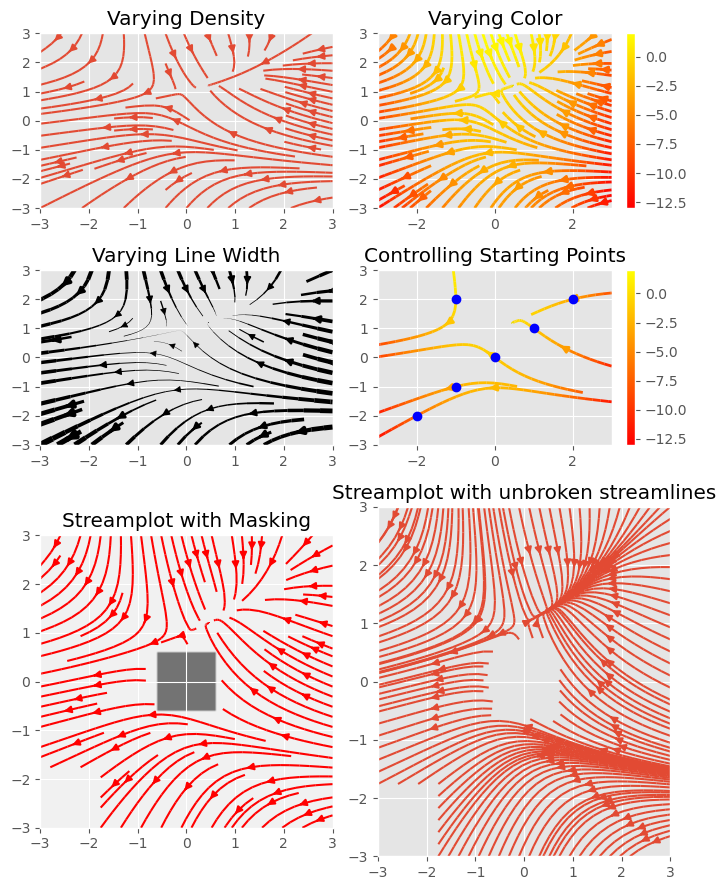

In [10]:
import matplotlib.pyplot as plt
import numpy as np

w = 3
Y, X = np.mgrid[-w:w:100j, -w:w:100j]
U = -1 - X**2 + Y
V = 1 + X - Y**2
speed = np.sqrt(U**2 + V**2)

fig, axs = plt.subplots(3, 2, figsize=(7, 9), height_ratios=[1, 1, 2])
axs = axs.flat

#  Varying density along a streamline
axs[0].streamplot(X, Y, U, V, density=[0.5, 1])
axs[0].set_title('Varying Density')

# Varying color along a streamline
strm = axs[1].streamplot(X, Y, U, V, color=U, linewidth=2, cmap='autumn')
fig.colorbar(strm.lines)
axs[1].set_title('Varying Color')

#  Varying line width along a streamline
lw = 5*speed / speed.max()
axs[2].streamplot(X, Y, U, V, density=0.6, color='k', linewidth=lw)
axs[2].set_title('Varying Line Width')

# Controlling the starting points of the streamlines
seed_points = np.array([[-2, -1, 0, 1, 2, -1], [-2, -1,  0, 1, 2, 2]])

strm = axs[3].streamplot(X, Y, U, V, color=U, linewidth=2,
                         cmap='autumn', start_points=seed_points.T)
fig.colorbar(strm.lines)
axs[3].set_title('Controlling Starting Points')

# Displaying the starting points with blue symbols.
axs[3].plot(seed_points[0], seed_points[1], 'bo')
axs[3].set(xlim=(-w, w), ylim=(-w, w))

# Create a mask
mask = np.zeros(U.shape, dtype=bool)
mask[40:60, 40:60] = True
U[:20, :20] = np.nan
U = np.ma.array(U, mask=mask)

axs[4].streamplot(X, Y, U, V, color='r')
axs[4].set_title('Streamplot with Masking')

axs[4].imshow(~mask, extent=(-w, w, -w, w), alpha=0.5, cmap='gray',
              aspect='auto')
axs[4].set_aspect('equal')

axs[5].streamplot(X, Y, U, V, broken_streamlines=False)
axs[5].set_title('Streamplot with unbroken streamlines')

plt.tight_layout()
plt.show()

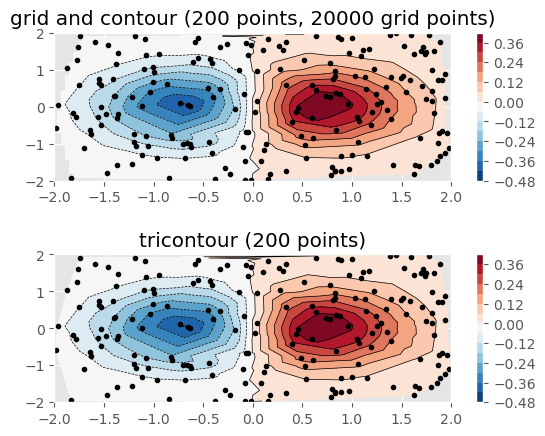

In [11]:
import matplotlib.pyplot as plt
import numpy as np

import matplotlib.tri as tri

np.random.seed(19680801)
npts = 200
ngridx = 100
ngridy = 200
x = np.random.uniform(-2, 2, npts)
y = np.random.uniform(-2, 2, npts)
z = x * np.exp(-x**2 - y**2)

fig, (ax1, ax2) = plt.subplots(nrows=2)

# -----------------------
# Interpolation on a grid
# -----------------------
# A contour plot of irregularly spaced data coordinates
# via interpolation on a grid.

# Create grid values first.
xi = np.linspace(-2.1, 2.1, ngridx)
yi = np.linspace(-2.1, 2.1, ngridy)

# Linearly interpolate the data (x, y) on a grid defined by (xi, yi).
triang = tri.Triangulation(x, y)
interpolator = tri.LinearTriInterpolator(triang, z)
Xi, Yi = np.meshgrid(xi, yi)
zi = interpolator(Xi, Yi)

# Note that scipy.interpolate provides means to interpolate data on a grid
# as well. The following would be an alternative to the four lines above:
# from scipy.interpolate import griddata
# zi = griddata((x, y), z, (xi[None, :], yi[:, None]), method='linear')

ax1.contour(xi, yi, zi, levels=14, linewidths=0.5, colors='k')
cntr1 = ax1.contourf(xi, yi, zi, levels=14, cmap="RdBu_r")

fig.colorbar(cntr1, ax=ax1)
ax1.plot(x, y, 'ko', ms=3)
ax1.set(xlim=(-2, 2), ylim=(-2, 2))
ax1.set_title('grid and contour (%d points, %d grid points)' %
              (npts, ngridx * ngridy))

# ----------
# Tricontour
# ----------
# Directly supply the unordered, irregularly spaced coordinates
# to tricontour.

ax2.tricontour(x, y, z, levels=14, linewidths=0.5, colors='k')
cntr2 = ax2.tricontourf(x, y, z, levels=14, cmap="RdBu_r")

fig.colorbar(cntr2, ax=ax2)
ax2.plot(x, y, 'ko', ms=3)
ax2.set(xlim=(-2, 2), ylim=(-2, 2))
ax2.set_title('tricontour (%d points)' % npts)

plt.subplots_adjust(hspace=0.5)
plt.show()

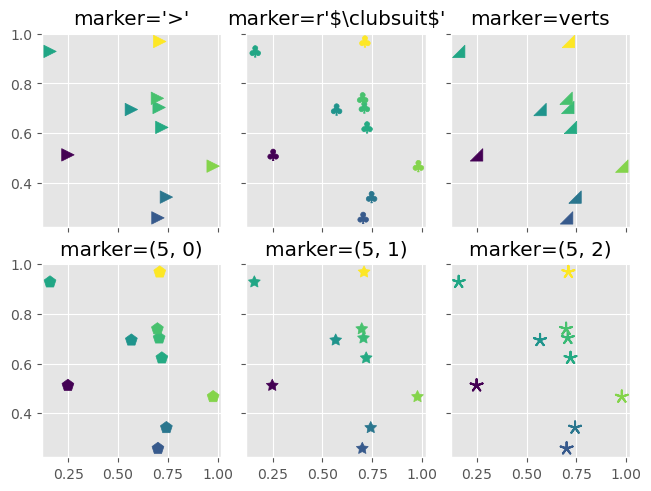

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)

x = np.random.rand(10)
y = np.random.rand(10)
z = np.sqrt(x**2 + y**2)

fig, axs = plt.subplots(2, 3, sharex=True, sharey=True, layout="constrained")

# Matplotlib marker symbol
axs[0, 0].scatter(x, y, s=80, c=z, marker=">")
axs[0, 0].set_title("marker='>'")

# marker from TeX: passing a TeX symbol name enclosed in $-signs
axs[0, 1].scatter(x, y, s=80, c=z, marker=r"$\clubsuit$")
axs[0, 1].set_title(r"marker=r'\$\clubsuit\$'")

# marker from path: passing a custom path of N vertices as a (N, 2) array-like
verts = [[-1, -1], [1, -1], [1, 1], [-1, -1]]
axs[0, 2].scatter(x, y, s=80, c=z, marker=verts)
axs[0, 2].set_title("marker=verts")

# regular pentagon marker
axs[1, 0].scatter(x, y, s=80, c=z, marker=(5, 0))
axs[1, 0].set_title("marker=(5, 0)")

# regular 5-pointed star marker
axs[1, 1].scatter(x, y, s=80, c=z, marker=(5, 1))
axs[1, 1].set_title("marker=(5, 1)")

# regular 5-pointed asterisk marker
axs[1, 2].scatter(x, y, s=80, c=z, marker=(5, 2))
axs[1, 2].set_title("marker=(5, 2)")

plt.show()